# Introduction

**Objective**<br>
X-Credit Solution strives to broaden financial inclusion for the unbanked population by
providing a positive and safe borrowing experience. In order to make sure this underserved
population has a positive loan experience, X-Credit Solution makes use of a variety of
alternative data including telco and transactional information to predict their clients' repayment
abilities.
While X-Credit Solution is currently using various statistical and machine learning methods to
make these predictions, your task is to help them unlock the full potential of their data. Doing so
will ensure that clients capable of repayment are not rejected and that loans are given with a
principal, maturity, and repayment calendar that will empower their clients to be successful.

$\textbf{ Muhammad Akbarul Azis }$ <br>
Email : makbarulazis@gmail.com<br>
Phone : +6282163807826<br>
<br>

In [1]:
import warnings
warnings.filterwarnings('ignore')

import re
import numpy as np
import pandas as pd
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib


from sklearn import model_selection
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

%matplotlib inline
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("darkgrid")
sns.color_palette("dark")
plt.style.use("ggplot")

# Load and Describe Data

## Load Data

In [142]:
train = pd.read_csv('data/application_train.csv')
print('Total Row', train.shape[0], ' ,Total Feature', train.shape[1],'\n')
train.head()

Total Row 307511  ,Total Feature 122 



,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [143]:
test = pd.read_csv('data/application_test.csv')
print('Total Row', test.shape[0], ' ,Total Feature', test.shape[1],'\n')
test.head()

Total Row 48744  ,Total Feature 121 



,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


## Data Description

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB


## Check Null and Missing Values Train Data

In [229]:
data_missing_value = train.isnull().sum().reset_index()
data_missing_value.columns = ['feature','missing_value']
data_missing_value['percentage'] = round((data_missing_value['missing_value']/len(train))*100,2)
data_missing_value = data_missing_value.sort_values('percentage', ascending=False).reset_index(drop=True)
data_missing_value = data_missing_value[data_missing_value['percentage']>0]
data_missing_value

,feature,missing_value,percentage


In [83]:
col_missing_value = data_missing_value['feature'].tolist() 
train[col_missing_value].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 64 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   COMMONAREA_MEDI               92646 non-null   float64
 1   COMMONAREA_AVG                92646 non-null   float64
 2   COMMONAREA_MODE               92646 non-null   float64
 3   NONLIVINGAPARTMENTS_MODE      93997 non-null   float64
 4   NONLIVINGAPARTMENTS_AVG       93997 non-null   float64
 5   NONLIVINGAPARTMENTS_MEDI      93997 non-null   float64
 6   FONDKAPREMONT_MODE            97216 non-null   object 
 7   LIVINGAPARTMENTS_MODE         97312 non-null   float64
 8   LIVINGAPARTMENTS_AVG          97312 non-null   float64
 9   LIVINGAPARTMENTS_MEDI         97312 non-null   float64
 10  FLOORSMIN_AVG                 98869 non-null   float64
 11  FLOORSMIN_MODE                98869 non-null   float64
 12  FLOORSMIN_MEDI                98869 non-null

<AxesSubplot:>

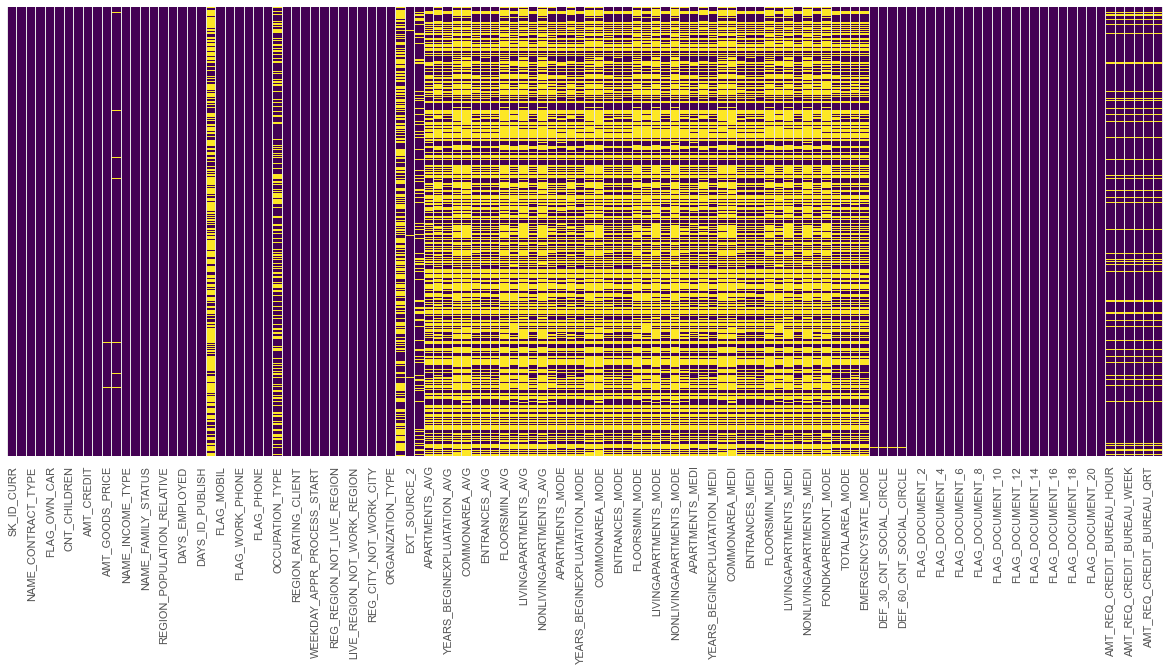

In [25]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

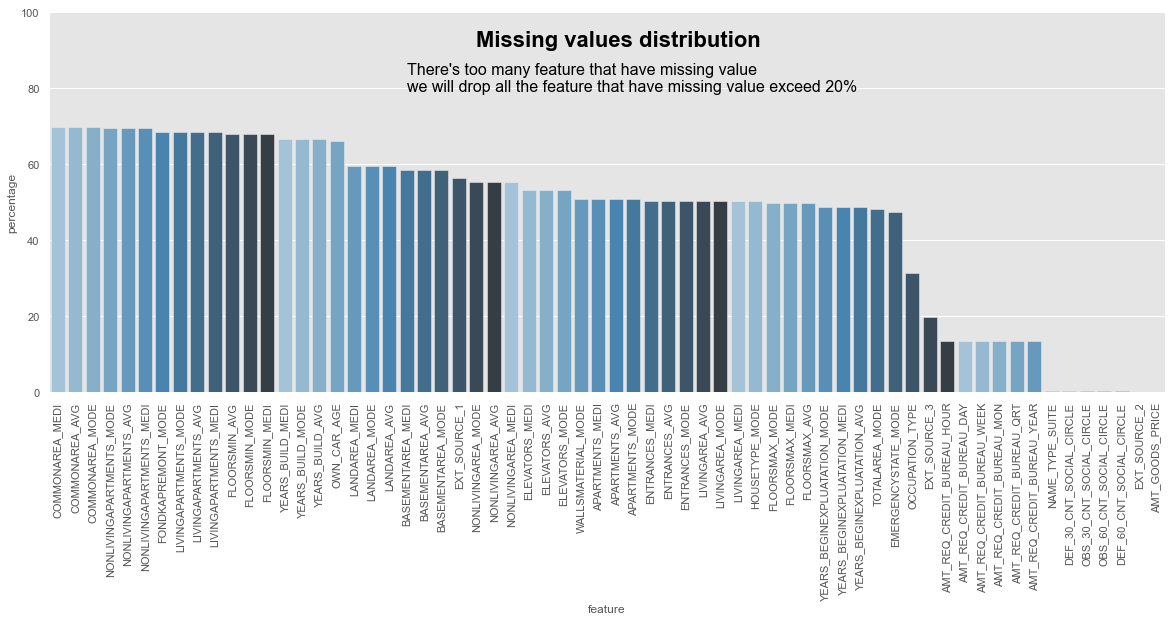

In [52]:
fig, ax = plt.subplots(figsize=(20,7))

g = sns.barplot(x = 'feature',y='percentage',data=data_missing_value,ax=ax, 
               palette=sns.color_palette("Blues_d", n_colors=13, desat=1))

x = np.arange(len(data_missing_value['feature']))
y = data_missing_value['percentage']

# for i, v in enumerate(y):
#     ax.text(x[i]-0.3, v+2, str(v)+'%', fontsize = 12, color='gray', fontweight='bold')
    
title = '''
Missing values distribution
'''
ax.text(24,85,title,horizontalalignment='left',color='black',fontsize=22,fontweight='bold')
    

text = '''

There's too many feature that have missing value
we will drop all the feature that have missing value exceed 20%

'''
ax.text(20,70,text,horizontalalignment='left',color='black',fontsize=16,fontweight='normal')
    
ax.set_ylim(0,100)

ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

In [145]:
data_missing_value20 = data_missing_value[data_missing_value['percentage']>20]
trainNullFeature = data_missing_value20['feature'].tolist() 
trainNullFeature

['COMMONAREA_MEDI',
 'COMMONAREA_AVG',
 'COMMONAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAPARTMENTS_MEDI',
 'FONDKAPREMONT_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAPARTMENTS_MEDI',
 'FLOORSMIN_AVG',
 'FLOORSMIN_MODE',
 'FLOORSMIN_MEDI',
 'YEARS_BUILD_MEDI',
 'YEARS_BUILD_MODE',
 'YEARS_BUILD_AVG',
 'OWN_CAR_AGE',
 'LANDAREA_MEDI',
 'LANDAREA_MODE',
 'LANDAREA_AVG',
 'BASEMENTAREA_MEDI',
 'BASEMENTAREA_AVG',
 'BASEMENTAREA_MODE',
 'EXT_SOURCE_1',
 'NONLIVINGAREA_MODE',
 'NONLIVINGAREA_AVG',
 'NONLIVINGAREA_MEDI',
 'ELEVATORS_MEDI',
 'ELEVATORS_AVG',
 'ELEVATORS_MODE',
 'WALLSMATERIAL_MODE',
 'APARTMENTS_MEDI',
 'APARTMENTS_AVG',
 'APARTMENTS_MODE',
 'ENTRANCES_MEDI',
 'ENTRANCES_AVG',
 'ENTRANCES_MODE',
 'LIVINGAREA_AVG',
 'LIVINGAREA_MODE',
 'LIVINGAREA_MEDI',
 'HOUSETYPE_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMAX_MEDI',
 'FLOORSMAX_AVG',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BEGINEXPLUATATIO

In [146]:
data_missing_value20 = data_missing_value[data_missing_value['percentage']<20]
trainUnder20 = data_missing_value20['feature'].tolist() 
trainUnder20

['EXT_SOURCE_3',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'NAME_TYPE_SUITE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'EXT_SOURCE_2',
 'AMT_GOODS_PRICE']

In [147]:
trainunder1 = ['NAME_TYPE_SUITE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'EXT_SOURCE_2',
 'AMT_GOODS_PRICE']

In [177]:
trainBetwwen = trainUnder20[0:7]
trainBetwwen

['EXT_SOURCE_3',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

## Check Null and Missing Values Test Data

In [149]:
data_missing_value = test.isnull().sum().reset_index()
data_missing_value.columns = ['feature','missing_value']
data_missing_value['percentage'] = round((data_missing_value['missing_value']/len(test))*100,2)
data_missing_value = data_missing_value.sort_values('percentage', ascending=False).reset_index(drop=True)
data_missing_value = data_missing_value[data_missing_value['percentage']>0]
data_missing_value

,feature,missing_value,percentage
0,COMMONAREA_AVG,33495,68.72
1,COMMONAREA_MODE,33495,68.72
2,COMMONAREA_MEDI,33495,68.72
3,NONLIVINGAPARTMENTS_AVG,33347,68.41
4,NONLIVINGAPARTMENTS_MODE,33347,68.41
...,...,...,...
59,OBS_30_CNT_SOCIAL_CIRCLE,29,0.06
60,OBS_60_CNT_SOCIAL_CIRCLE,29,0.06
61,DEF_60_CNT_SOCIAL_CIRCLE,29,0.06
62,AMT_ANNUITY,24,0.05


In [88]:
col_missing_value = data_missing_value['feature'].tolist() 
test[col_missing_value].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Data columns (total 64 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   COMMONAREA_AVG                15249 non-null  float64
 1   COMMONAREA_MODE               15249 non-null  float64
 2   COMMONAREA_MEDI               15249 non-null  float64
 3   NONLIVINGAPARTMENTS_AVG       15397 non-null  float64
 4   NONLIVINGAPARTMENTS_MODE      15397 non-null  float64
 5   NONLIVINGAPARTMENTS_MEDI      15397 non-null  float64
 6   FONDKAPREMONT_MODE            15947 non-null  object 
 7   LIVINGAPARTMENTS_AVG          15964 non-null  float64
 8   LIVINGAPARTMENTS_MODE         15964 non-null  float64
 9   LIVINGAPARTMENTS_MEDI         15964 non-null  float64
 10  FLOORSMIN_MEDI                16278 non-null  float64
 11  FLOORSMIN_AVG                 16278 non-null  float64
 12  FLOORSMIN_MODE                16278 non-null  float64
 13  O

<AxesSubplot:>

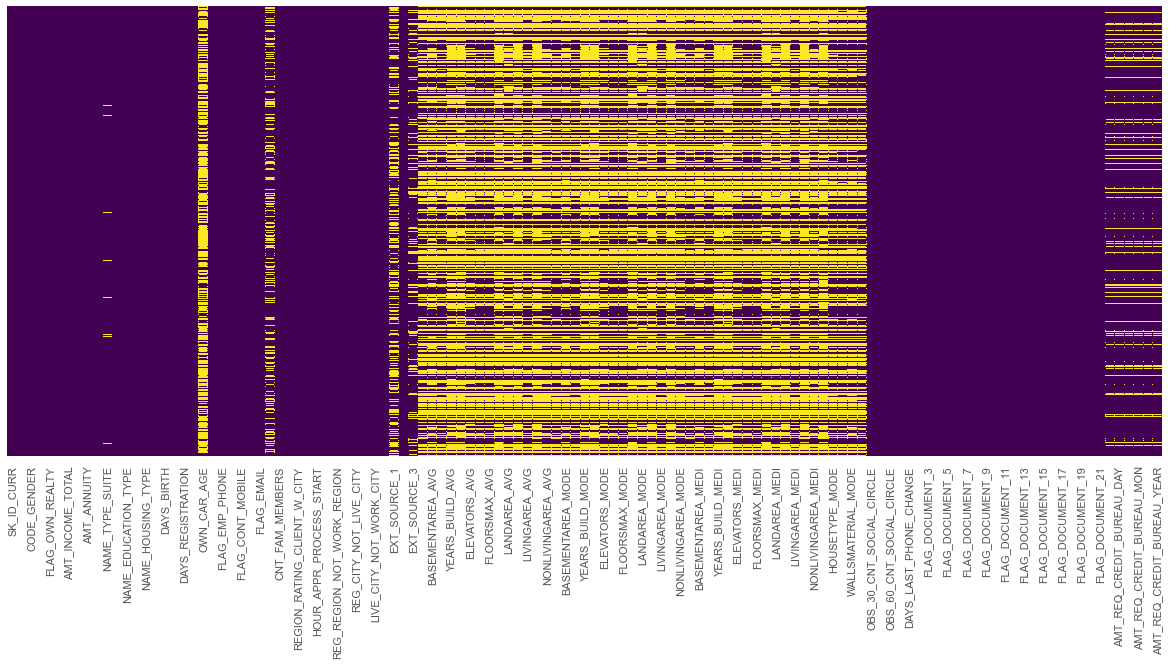

In [55]:
sns.heatmap(test.isnull(), yticklabels=False, cbar=False, cmap='viridis')

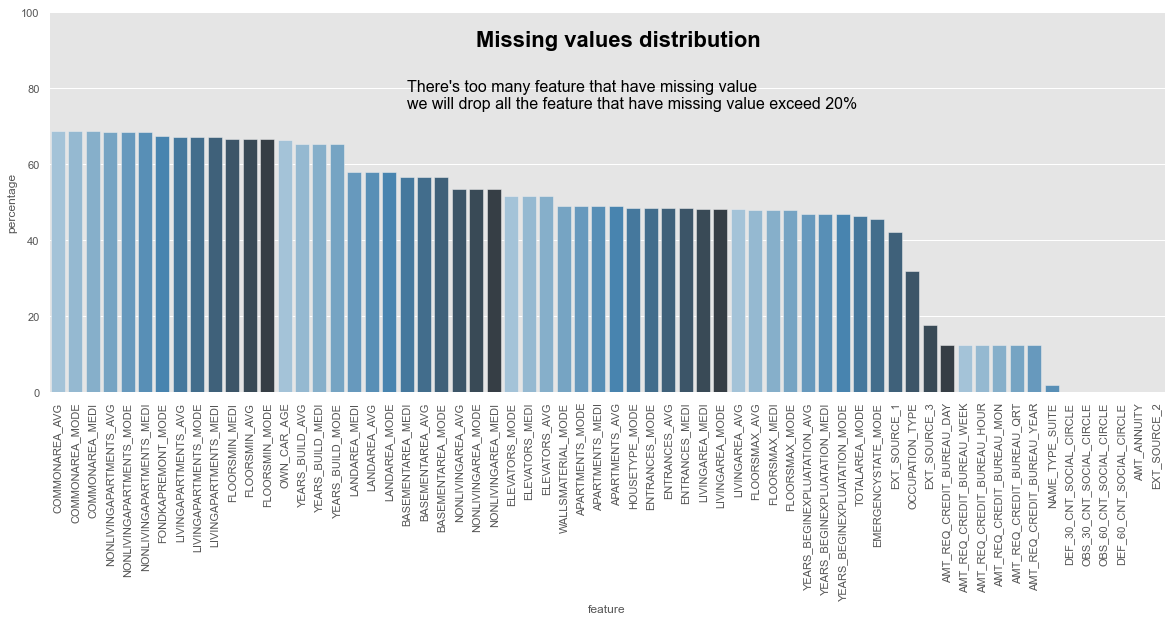

In [56]:
fig, ax = plt.subplots(figsize=(20,7))

g = sns.barplot(x = 'feature',y='percentage',data=data_missing_value,ax=ax, 
               palette=sns.color_palette("Blues_d", n_colors=13, desat=1))

x = np.arange(len(data_missing_value['feature']))
y = data_missing_value['percentage']

# for i, v in enumerate(y):
#     ax.text(x[i]-0.3, v+2, str(v)+'%', fontsize = 12, color='gray', fontweight='bold')
    
title = '''
Missing values distribution
'''
ax.text(24,85,title,horizontalalignment='left',color='black',fontsize=22,fontweight='bold')
    

text = '''

There's too many feature that have missing value
we will drop all the feature that have missing value exceed 20%
'''
ax.text(20,70,text,horizontalalignment='left',color='black',fontsize=16,fontweight='normal')
    
ax.set_ylim(0,100)

ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

In [150]:
data_missing_value20 = data_missing_value[data_missing_value['percentage']>20]
testNullFeature = data_missing_value20['feature'].tolist() 
testNullFeature

['COMMONAREA_AVG',
 'COMMONAREA_MODE',
 'COMMONAREA_MEDI',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAPARTMENTS_MEDI',
 'FONDKAPREMONT_MODE',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAPARTMENTS_MEDI',
 'FLOORSMIN_MEDI',
 'FLOORSMIN_AVG',
 'FLOORSMIN_MODE',
 'OWN_CAR_AGE',
 'YEARS_BUILD_AVG',
 'YEARS_BUILD_MEDI',
 'YEARS_BUILD_MODE',
 'LANDAREA_MEDI',
 'LANDAREA_AVG',
 'LANDAREA_MODE',
 'BASEMENTAREA_MEDI',
 'BASEMENTAREA_AVG',
 'BASEMENTAREA_MODE',
 'NONLIVINGAREA_AVG',
 'NONLIVINGAREA_MODE',
 'NONLIVINGAREA_MEDI',
 'ELEVATORS_MODE',
 'ELEVATORS_MEDI',
 'ELEVATORS_AVG',
 'WALLSMATERIAL_MODE',
 'APARTMENTS_MODE',
 'APARTMENTS_MEDI',
 'APARTMENTS_AVG',
 'HOUSETYPE_MODE',
 'ENTRANCES_MODE',
 'ENTRANCES_AVG',
 'ENTRANCES_MEDI',
 'LIVINGAREA_MEDI',
 'LIVINGAREA_MODE',
 'LIVINGAREA_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMAX_MEDI',
 'FLOORSMAX_MODE',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BEGINEXPLUATATION_MODE',
 'TOTALAR

In [151]:
data_missing_value20 = data_missing_value[data_missing_value['percentage']<20]
testUnder20 = data_missing_value20['feature'].tolist() 
testUnder20

['EXT_SOURCE_3',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'NAME_TYPE_SUITE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'AMT_ANNUITY',
 'EXT_SOURCE_2']

In [152]:
testUnder2 =  ['NAME_TYPE_SUITE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'AMT_ANNUITY',
 'EXT_SOURCE_2']

In [176]:
testBetwwen = testUnder20[0:7]
testBetwwen

['EXT_SOURCE_3',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

## Numerical Data Train

In [30]:
numerics = ['int8','int16', 'int32', 'int64', 'float16', 'float32', 'float64']
display(train.select_dtypes(include=numerics).columns)
print(train.select_dtypes(include=numerics).shape)
data_num_train = train.select_dtypes(include=numerics)
data_num_train.head(3)

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMEN

(304543, 61)


,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## Numerical Data Test

In [29]:
numerics = ['int8','int16', 'int32', 'int64', 'float16', 'float32', 'float64']
display(test.select_dtypes(include=numerics).columns)
print(test.select_dtypes(include=numerics).shape)
data_num_test = test.select_dtypes(include=numerics)
data_num_test.head(3)

Index(['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLA

(47772, 60)


,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,0,135000.0,568800.0,20560.5,450000.0,0.018850,-19241,-2329,-5170.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,0,99000.0,222768.0,17370.0,180000.0,0.035792,-18064,-4469,-9118.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
3,100028,2,315000.0,1575000.0,49018.5,1575000.0,0.026392,-13976,-1866,-2000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0


## Non Numerical Data Train

In [31]:
display(train.select_dtypes(include=['object']).columns)
print(train.select_dtypes(include=object).shape)
data_cat_train = train.select_dtypes(include=['object'])
data_cat_train.head(3)

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'ORGANIZATION_TYPE'],
      dtype='object')

(304543, 11)


,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,WEDNESDAY,Business Entity Type 3
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,MONDAY,School
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,MONDAY,Government


## Non Numerical Data Test

In [32]:
display(test.select_dtypes(include=['object']).columns)
print(test.select_dtypes(include=object).shape)
data_cat_test = test.select_dtypes(include=['object'])
data_cat_test.head(3)

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'ORGANIZATION_TYPE'],
      dtype='object')

(47772, 11)


,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE
0,Cash loans,F,N,Y,Unaccompanied,Working,Higher education,Married,House / apartment,TUESDAY,Kindergarten
1,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,FRIDAY,Self-employed
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,WEDNESDAY,Business Entity Type 3


# Data Preparation

In [31]:
train = pd.read_csv('data/application_train.csv')
print('Total Row', train.shape[0], ' ,Total Feature', train.shape[1],'\n')

Total Row 307511  ,Total Feature 122 



In [33]:
test = pd.read_csv('data/application_test.csv')
print('Total Row', test.shape[0], ' ,Total Feature', test.shape[1],'\n')

Total Row 48744  ,Total Feature 121 



##  Handle Missing Values

**drop all the values that have missing value**

In [154]:
train = train.drop(trainNullFeature, axis=1)

In [155]:
test = test.drop(testNullFeature, axis=1)

**DROP all row that contains feature nul under 1 percent**

In [156]:
train = train.dropna(subset=trainunder1)

In [157]:
test = test.dropna(subset=testUnder2)

**Fill Missing Value With Mean**

In [178]:
for i in range(len(trainBetwwen)):
    train[trainBetwwen[i]].fillna(train[trainBetwwen[i]].mean(), inplace=True)

In [179]:
for i in range(len(testBetwwen)):
    test[testBetwwen[i]].fillna(test[testBetwwen[i]].mean(), inplace=True)

## Transform categorical variables

### Check Cardinality

In [34]:
col_cat = list(data_cat_train)
for i in col_cat:
    print(i, ' ---UNIQUE VALUE--  ',len(train[i].unique()))

NAME_CONTRACT_TYPE  ---UNIQUE VALUE--   2
CODE_GENDER  ---UNIQUE VALUE--   3
FLAG_OWN_CAR  ---UNIQUE VALUE--   2
FLAG_OWN_REALTY  ---UNIQUE VALUE--   2
NAME_TYPE_SUITE  ---UNIQUE VALUE--   7
NAME_INCOME_TYPE  ---UNIQUE VALUE--   8
NAME_EDUCATION_TYPE  ---UNIQUE VALUE--   5
NAME_FAMILY_STATUS  ---UNIQUE VALUE--   5
NAME_HOUSING_TYPE  ---UNIQUE VALUE--   6
WEEKDAY_APPR_PROCESS_START  ---UNIQUE VALUE--   7
ORGANIZATION_TYPE  ---UNIQUE VALUE--   58


In [39]:
col_cat = list(data_cat_test)
for i in col_cat:
    print(i, ' ---UNIQUE VALUE--  ',len(test[i].unique()))

NAME_CONTRACT_TYPE  ---UNIQUE VALUE--   2
CODE_GENDER  ---UNIQUE VALUE--   2
FLAG_OWN_CAR  ---UNIQUE VALUE--   2
FLAG_OWN_REALTY  ---UNIQUE VALUE--   2
NAME_TYPE_SUITE  ---UNIQUE VALUE--   7
NAME_INCOME_TYPE  ---UNIQUE VALUE--   6
NAME_EDUCATION_TYPE  ---UNIQUE VALUE--   5
NAME_FAMILY_STATUS  ---UNIQUE VALUE--   5
NAME_HOUSING_TYPE  ---UNIQUE VALUE--   6
WEEKDAY_APPR_PROCESS_START  ---UNIQUE VALUE--   7
ORGANIZATION_TYPE  ---UNIQUE VALUE--   58


### Code_Gender in Train

In [41]:
train['CODE_GENDER'].value_counts().head(3)

F      200490
M      104049
XNA         4
Name: CODE_GENDER, dtype: int64

**convert Gender XNA with F**

In [340]:
train['CODE_GENDER'].replace('XNA', 'F', inplace=True)

## Matrix Correlation

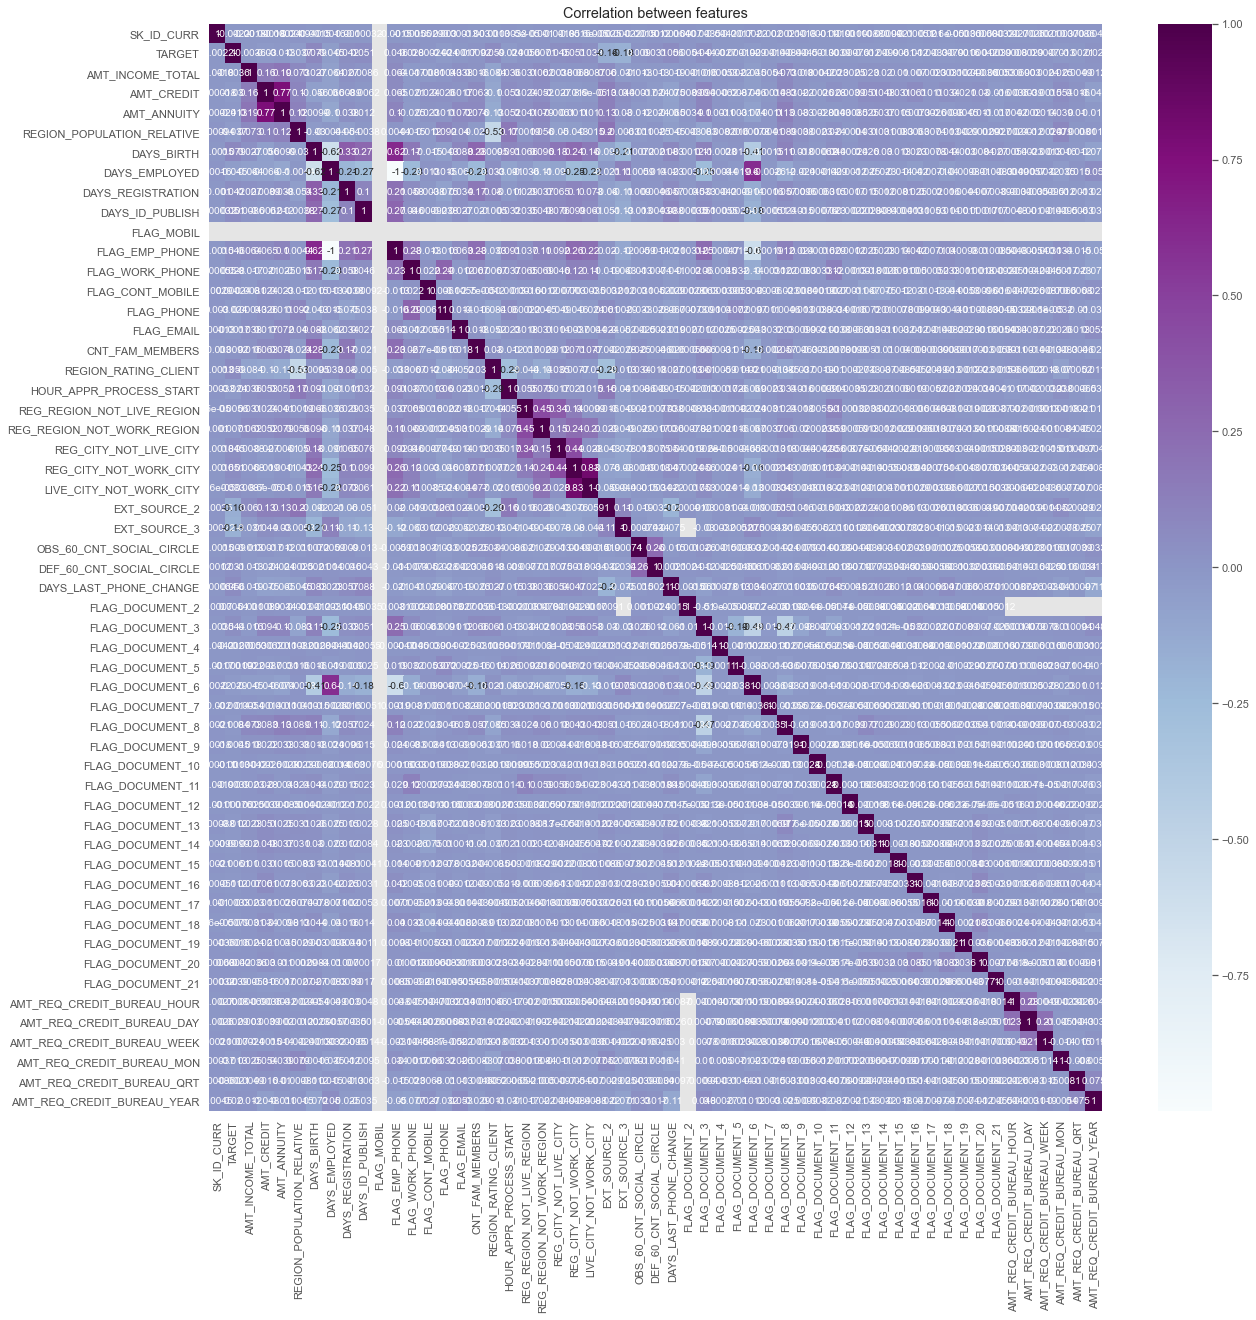

In [80]:
train_corr = train.corr()

plt.figure(figsize = (20, 20))
sns.heatmap(train_corr, annot=True, cmap='BuPu')
plt.title('Correlation between features')
plt.show()

In [64]:
train_corr['AMT_CREDIT'].sort_values(ascending=False)

AMT_CREDIT                     1.000000
AMT_GOODS_PRICE                0.986975
AMT_ANNUITY                    0.769209
AMT_INCOME_TOTAL               0.155282
EXT_SOURCE_2                   0.131530
                                 ...   
DAYS_EMPLOYED                 -0.066468
DAYS_LAST_PHONE_CHANGE        -0.075246
REGION_RATING_CLIENT          -0.101753
REGION_RATING_CLIENT_W_CITY   -0.110985
FLAG_MOBIL                          NaN
Name: AMT_CREDIT, Length: 61, dtype: float64

In [65]:
train_corr['AMT_ANNUITY'].sort_values(ascending=False)

AMT_ANNUITY                    1.000000
AMT_GOODS_PRICE                0.774273
AMT_CREDIT                     0.769209
AMT_INCOME_TOTAL               0.189891
FLAG_DOCUMENT_8                0.130765
                                 ...   
FLAG_DOCUMENT_6               -0.073671
DAYS_EMPLOYED                 -0.104776
REGION_RATING_CLIENT          -0.128505
REGION_RATING_CLIENT_W_CITY   -0.141772
FLAG_MOBIL                          NaN
Name: AMT_ANNUITY, Length: 61, dtype: float64

In [66]:
train_corr['AMT_GOODS_PRICE'].sort_values(ascending=False)

AMT_GOODS_PRICE                1.000000
AMT_CREDIT                     0.986975
AMT_ANNUITY                    0.774273
AMT_INCOME_TOTAL               0.157976
EXT_SOURCE_2                   0.139568
                                 ...   
DAYS_EMPLOYED                 -0.064334
DAYS_LAST_PHONE_CHANGE        -0.077927
REGION_RATING_CLIENT          -0.103581
REGION_RATING_CLIENT_W_CITY   -0.112116
FLAG_MOBIL                          NaN
Name: AMT_GOODS_PRICE, Length: 61, dtype: float64

In [67]:
train_corr['CNT_CHILDREN'].sort_values(ascending=False)

CNT_CHILDREN                  1.000000
CNT_FAM_MEMBERS               0.879265
DAYS_BIRTH                    0.331517
FLAG_EMP_PHONE                0.240651
DAYS_REGISTRATION             0.183526
                                ...   
AMT_REQ_CREDIT_BUREAU_YEAR   -0.041758
EXT_SOURCE_3                 -0.042569
FLAG_DOCUMENT_6              -0.156903
DAYS_EMPLOYED                -0.239751
FLAG_MOBIL                         NaN
Name: CNT_CHILDREN, Length: 61, dtype: float64

In [70]:
train_corr['REGION_RATING_CLIENT'].sort_values(ascending=False)

REGION_RATING_CLIENT           1.000000
REGION_RATING_CLIENT_W_CITY    0.950611
DAYS_REGISTRATION              0.080429
FLAG_DOCUMENT_3                0.061027
TARGET                         0.058911
                                 ...   
LIVE_REGION_NOT_WORK_REGION   -0.146066
HOUR_APPR_PROCESS_START       -0.285368
EXT_SOURCE_2                  -0.292436
REGION_POPULATION_RELATIVE    -0.531796
FLAG_MOBIL                          NaN
Name: REGION_RATING_CLIENT, Length: 61, dtype: float64

In [73]:
train_corr['REG_REGION_NOT_WORK_REGION'].sort_values(ascending=False)

REG_REGION_NOT_WORK_REGION     1.000000
LIVE_REGION_NOT_WORK_REGION    0.860094
REG_REGION_NOT_LIVE_REGION     0.452107
REG_CITY_NOT_WORK_CITY         0.240470
LIVE_CITY_NOT_WORK_CITY        0.197389
                                 ...   
FLAG_DOCUMENT_6               -0.066839
DAYS_EMPLOYED                 -0.107067
REGION_RATING_CLIENT_W_CITY   -0.133051
REGION_RATING_CLIENT          -0.139545
FLAG_MOBIL                          NaN
Name: REG_REGION_NOT_WORK_REGION, Length: 61, dtype: float64

In [74]:
train_corr['FLAG_DOCUMENT_6'].sort_values(ascending=False)

FLAG_DOCUMENT_6           1.000000
DAYS_EMPLOYED             0.597067
EXT_SOURCE_3              0.074993
DAYS_LAST_PHONE_CHANGE    0.034407
REGION_RATING_CLIENT      0.020816
                            ...   
DAYS_ID_PUBLISH          -0.178215
DAYS_BIRTH               -0.406776
FLAG_DOCUMENT_3          -0.489630
FLAG_EMP_PHONE           -0.597315
FLAG_MOBIL                     NaN
Name: FLAG_DOCUMENT_6, Length: 61, dtype: float64

In [76]:
train_corr['OBS_30_CNT_SOCIAL_CIRCLE'].sort_values(ascending=False)

OBS_30_CNT_SOCIAL_CIRCLE       1.000000
OBS_60_CNT_SOCIAL_CIRCLE       0.998495
DEF_30_CNT_SOCIAL_CIRCLE       0.329342
DEF_60_CNT_SOCIAL_CIRCLE       0.253544
REGION_RATING_CLIENT           0.034448
                                 ...   
LIVE_REGION_NOT_WORK_REGION   -0.023020
FLAG_DOCUMENT_8               -0.023564
REG_REGION_NOT_WORK_REGION    -0.028756
FLAG_PHONE                    -0.033485
FLAG_MOBIL                          NaN
Name: OBS_30_CNT_SOCIAL_CIRCLE, Length: 61, dtype: float64

In [83]:
# train_corr['DEF_30_CNT_SOCIAL_CIRCLE'].sort_values(ascending=False)

In [81]:
train_corr['TARGET'].sort_values(ascending=False)

TARGET                        1.000000
DAYS_BIRTH                    0.078630
REGION_RATING_CLIENT          0.058911
DAYS_LAST_PHONE_CHANGE        0.055885
DAYS_ID_PUBLISH               0.051394
REG_CITY_NOT_WORK_CITY        0.051139
FLAG_EMP_PHONE                0.046217
REG_CITY_NOT_LIVE_CITY        0.044713
FLAG_DOCUMENT_3               0.043944
DAYS_REGISTRATION             0.042264
LIVE_CITY_NOT_WORK_CITY       0.032533
DEF_60_CNT_SOCIAL_CIRCLE      0.031143
FLAG_WORK_PHONE               0.028361
AMT_REQ_CREDIT_BUREAU_YEAR    0.019634
CNT_FAM_MEMBERS               0.009190
OBS_60_CNT_SOCIAL_CIRCLE      0.008999
REG_REGION_NOT_WORK_REGION    0.007063
REG_REGION_NOT_LIVE_REGION    0.005627
FLAG_DOCUMENT_2               0.005429
FLAG_DOCUMENT_21              0.003919
AMT_REQ_CREDIT_BUREAU_DAY     0.002900
AMT_REQ_CREDIT_BUREAU_HOUR    0.000797
AMT_REQ_CREDIT_BUREAU_WEEK    0.000699
FLAG_DOCUMENT_20              0.000416
FLAG_CONT_MOBILE              0.000236
FLAG_DOCUMENT_5          

**Drop Feature that have high correlation**

In [160]:
train = train.drop(['DEF_30_CNT_SOCIAL_CIRCLE','OBS_30_CNT_SOCIAL_CIRCLE', 'LIVE_REGION_NOT_WORK_REGION', 'REGION_RATING_CLIENT_W_CITY','CNT_CHILDREN', 'AMT_GOODS_PRICE'], axis=1)

In [161]:
test = test.drop(['DEF_30_CNT_SOCIAL_CIRCLE','OBS_30_CNT_SOCIAL_CIRCLE', 'LIVE_REGION_NOT_WORK_REGION', 'REGION_RATING_CLIENT_W_CITY','CNT_CHILDREN', 'AMT_GOODS_PRICE'], axis=1)

## EDA

### Target Feature

Text(0.5, 1.0, 'Target Feature')

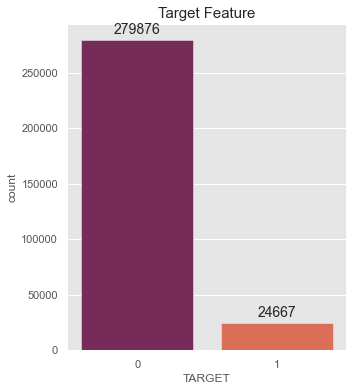

In [94]:
plt.figure(figsize=(5,6))
ax = sns.countplot(x='TARGET', data=train, palette='rocket')
for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()),
                    xy=(p.get_x() + p.get_width() / 2, p.get_height()),
                    xytext=(0, 3),fontsize=14,
                    textcoords="offset points",
                    ha='center', va='bottom')
ax.set_title('Target Feature', fontsize=15)

In [95]:
train['TARGET'].value_counts(normalize=True)

0    0.919003
1    0.080997
Name: TARGET, dtype: float64

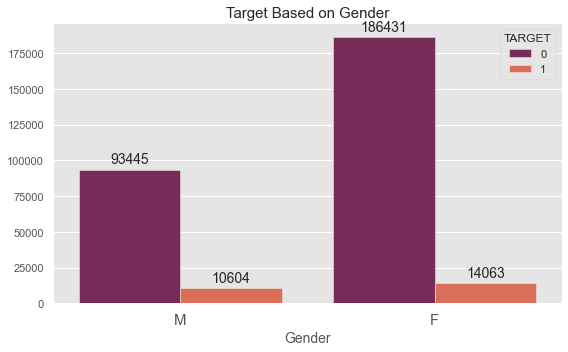

In [341]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x='CODE_GENDER', data=train, hue='TARGET',palette='rocket')
ax.set_title('Target Based on Gender', fontsize=15)
ax.set_xlabel('Gender', fontsize= 14)
ax.set_ylabel('')
plt.xticks(fontsize=15)
plt.tight_layout()
for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()),
                    xy=(p.get_x() + p.get_width() / 2, p.get_height()),
                    xytext=(0, 3),fontsize=14,
                    textcoords="offset points",
                    ha='center', va='bottom')

### AMT_ANNUITY FEATURE

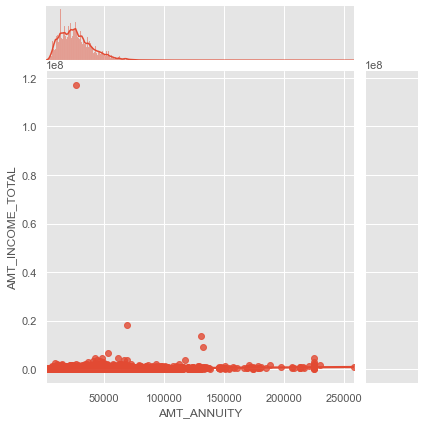

In [97]:
sns.jointplot(x="AMT_ANNUITY", y="AMT_INCOME_TOTAL", data=train, kind="reg");

**AMT ANNUITY correlation with AMT_INCOME_TOTAL. Hypothetically, this means that an increase in AMT_ANNUITY will have no an impact on AMT_ANNUITY**<br>


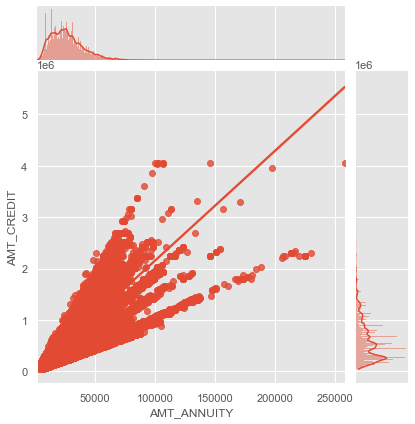

In [104]:
sns.jointplot(x="AMT_ANNUITY", y="AMT_CREDIT", data=train, kind="reg");

**AMT ANNUITY had a positive correlation with AMT_CREDIT. Hypothetically, this means that an increase in AMT_ANNUITY will have an impact on AMT_Credit**<br>


7351


[array([1., 1., 1., ..., 1., 1., 1.])]

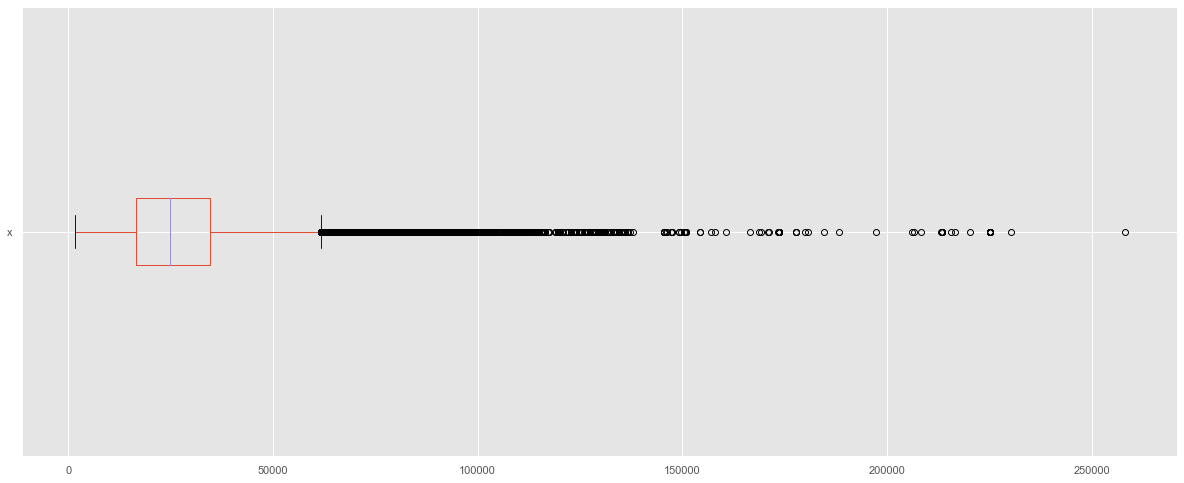

In [96]:
_, bp = pd.DataFrame.boxplot((train['AMT_ANNUITY']), return_type='both',vert=False)

outliers = [flier.get_ydata() for flier in bp["fliers"]]
print(len(outliers[0]))
outliers[0].min()
outliers

6481


[array([1., 1., 1., ..., 1., 1., 1.])]

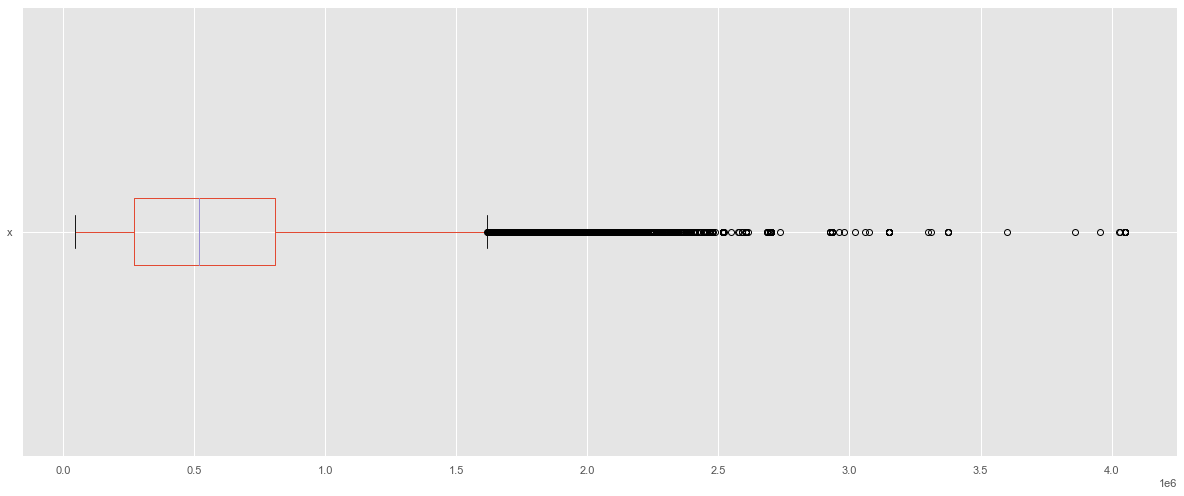

In [127]:
_, bp = pd.DataFrame.boxplot((train['AMT_CREDIT']), return_type='both',vert=False)

outliers = [flier.get_ydata() for flier in bp["fliers"]]
print(len(outliers[0]))
outliers[0].min()
outliers

13787


[array([1., 1., 1., ..., 1., 1., 1.])]

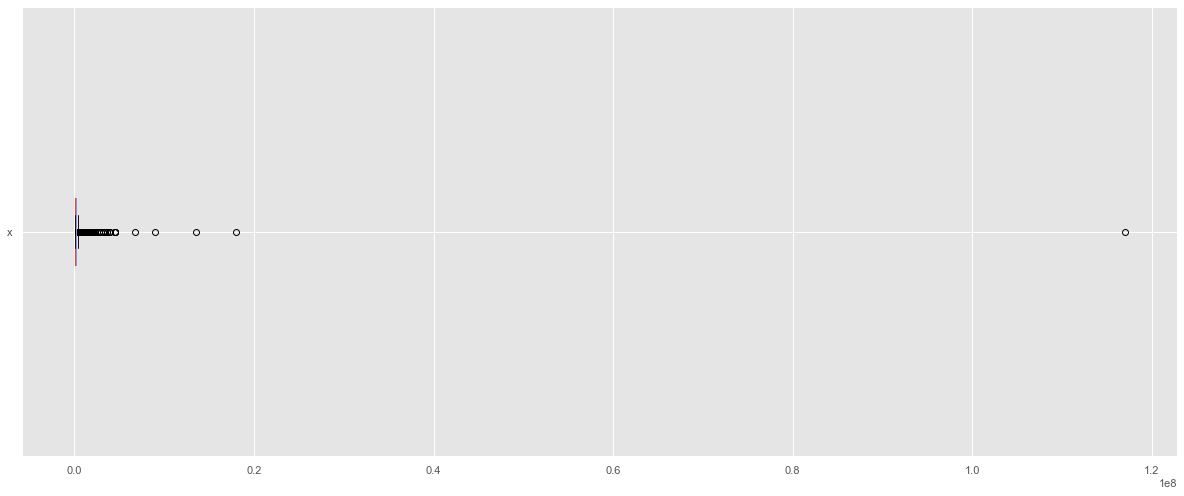

In [129]:
_, bp = pd.DataFrame.boxplot((train['AMT_INCOME_TOTAL']), return_type='both',vert=False)

outliers = [flier.get_ydata() for flier in bp["fliers"]]
print(len(outliers[0]))
outliers[0].min()
outliers

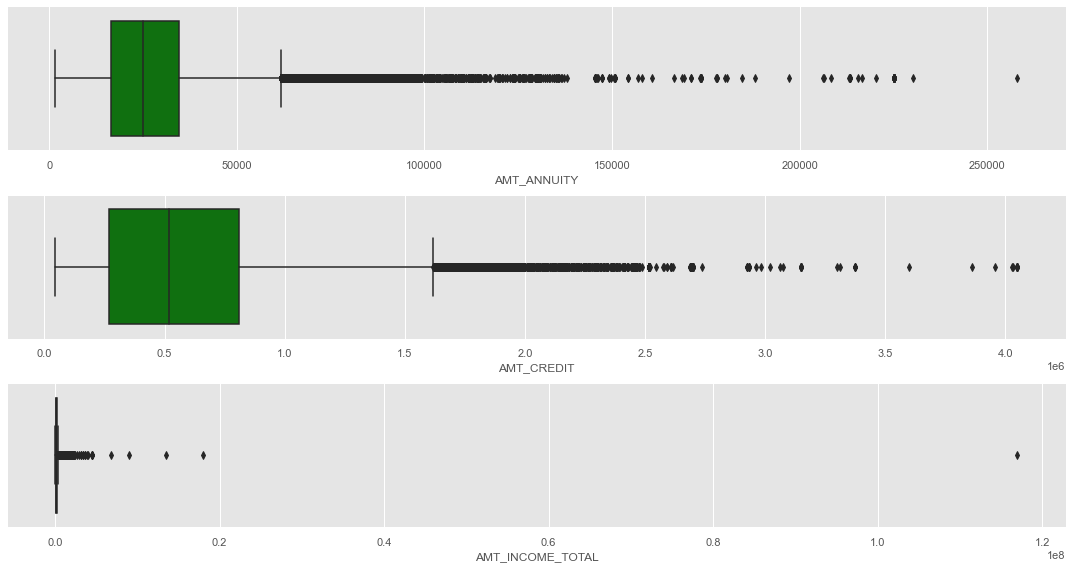

In [343]:
features = ['AMT_ANNUITY','AMT_CREDIT','AMT_INCOME_TOTAL']
plt.figure(figsize=(15, 8))
for i in range(0, len(features)):
    plt.subplot(3, 1, i+1)
    sns.boxplot(train[features[i]],color='green',orient='v')
    plt.tight_layout()


**There are many outlier in AMT_ANNUITY, AMT_CREDIT, AMT_INCOME_TOTAL**

### FLAG CARS and FLAG OWN REALTY Feature

In [113]:
def percentage_hue(plot, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.1
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            plot.annotate(percentage, (x, y), size = 12, va='bottom')
    plt.show()

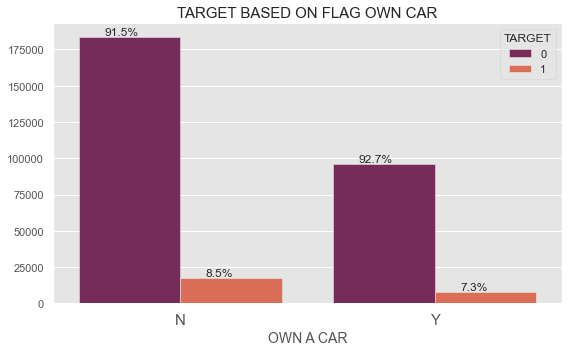

In [114]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x='FLAG_OWN_CAR', data=train, hue='TARGET',palette='rocket')
ax.set_title('TARGET BASED ON FLAG OWN CAR', fontsize=15)
ax.set_xlabel('OWN A CAR', fontsize= 14)
ax.set_ylabel('')
plt.xticks(fontsize=15)
plt.tight_layout()
percentage_hue(ax, train['FLAG_OWN_CAR'], 2,2)

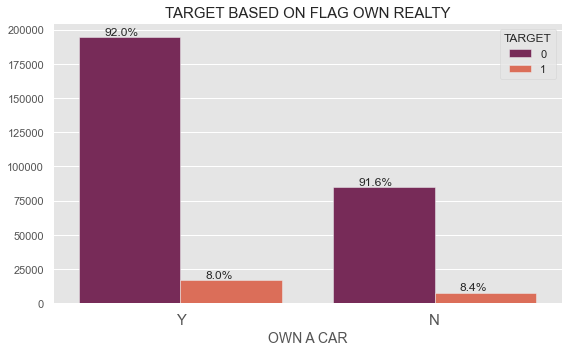

In [116]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x='FLAG_OWN_REALTY', data=train, hue='TARGET',palette='rocket')
ax.set_title('TARGET BASED ON FLAG OWN REALTY', fontsize=15)
ax.set_xlabel('OWN A CAR', fontsize= 14)
ax.set_ylabel('')
plt.xticks(fontsize=15)
plt.tight_layout()
percentage_hue(ax, train['FLAG_OWN_REALTY'], 2,2)

### NAME_CONTRACT_TYPE FEATURE

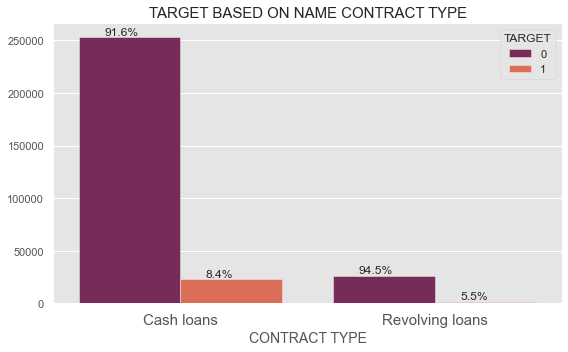

In [124]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x='NAME_CONTRACT_TYPE', data=train, hue='TARGET',palette='rocket')
ax.set_title('TARGET BASED ON NAME CONTRACT TYPE', fontsize=15)
ax.set_xlabel('CONTRACT TYPE', fontsize= 14)
ax.set_ylabel('')
plt.xticks(fontsize=15)
plt.tight_layout()
percentage_hue(ax, train['NAME_CONTRACT_TYPE'], 2,2)

### 'NAME_TYPE_SUITE' Feature

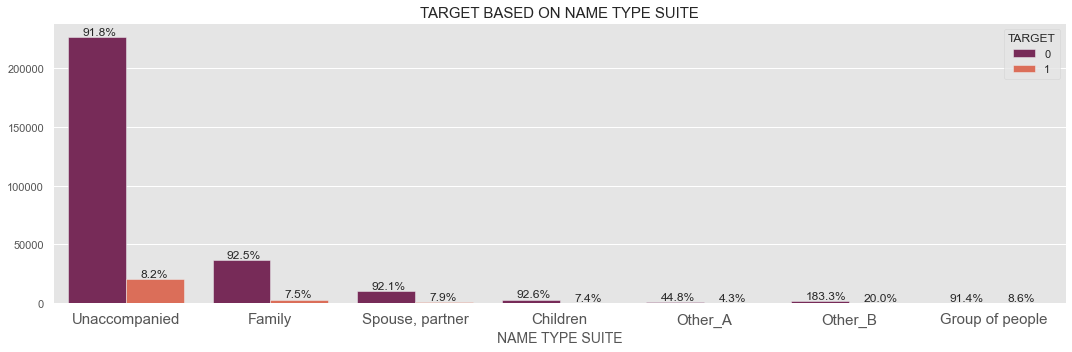

In [126]:
plt.figure(figsize=(15,5))
ax = sns.countplot(x='NAME_TYPE_SUITE', data=train, hue='TARGET',palette='rocket')
ax.set_title('TARGET BASED ON NAME TYPE SUITE', fontsize=15)
ax.set_xlabel('NAME TYPE SUITE', fontsize= 14)
ax.set_ylabel('')
plt.xticks(fontsize=15)
plt.tight_layout()
percentage_hue(ax, train['NAME_TYPE_SUITE'], 7,2)

### 'NAME_INCOME_TYPE' Feature

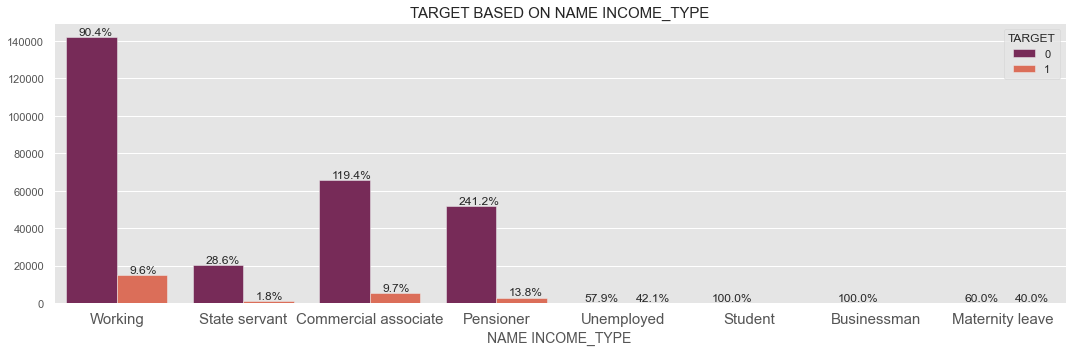

In [132]:
plt.figure(figsize=(15,5))
ax = sns.countplot(x='NAME_INCOME_TYPE', data=train, hue='TARGET',palette='rocket')
ax.set_title('TARGET BASED ON NAME INCOME_TYPE', fontsize=15)
ax.set_xlabel('NAME INCOME_TYPE', fontsize= 14)
ax.set_ylabel('')
plt.xticks(fontsize=15)
plt.tight_layout()
percentage_hue(ax, train['NAME_INCOME_TYPE'], 8,2)

### 'NAME_EDUCATION_TYPE' Feature

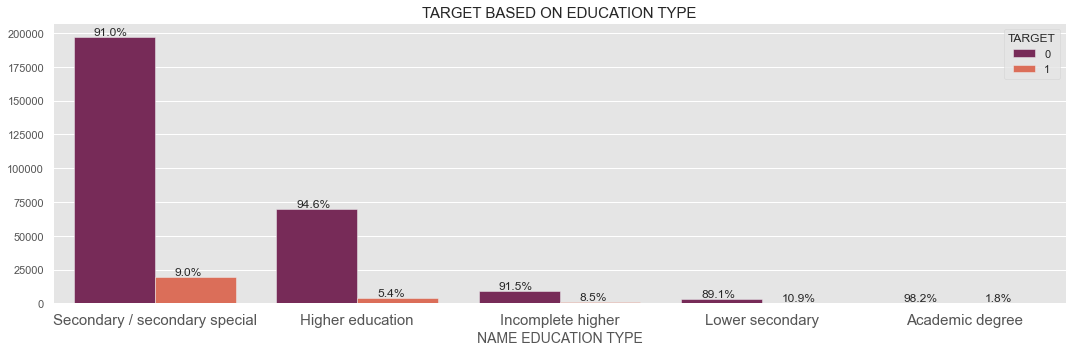

In [134]:
plt.figure(figsize=(15,5))
ax = sns.countplot(x='NAME_EDUCATION_TYPE', data=train, hue='TARGET',palette='rocket')
ax.set_title('TARGET BASED ON EDUCATION TYPE', fontsize=15)
ax.set_xlabel('NAME EDUCATION TYPE', fontsize= 14)
ax.set_ylabel('')
plt.xticks(fontsize=15)
plt.tight_layout()
percentage_hue(ax, train['NAME_EDUCATION_TYPE'], 5,2)

### 'NAME_FAMILY_STATUS' Feature

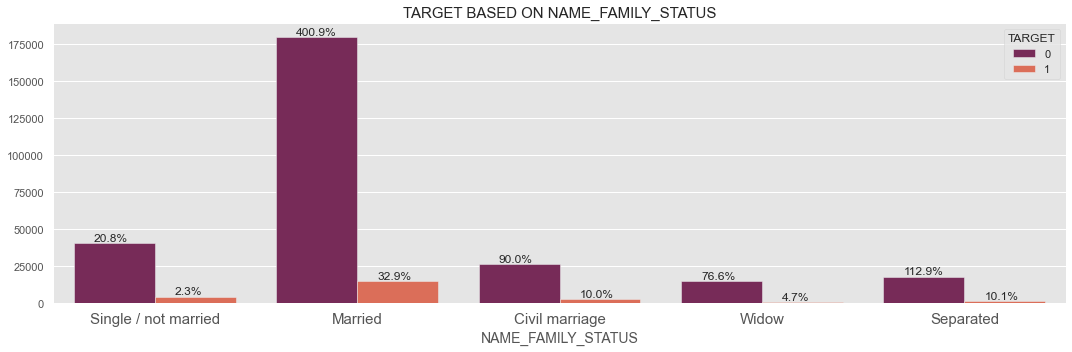

In [135]:

plt.figure(figsize=(15,5))
ax = sns.countplot(x='NAME_FAMILY_STATUS', data=train, hue='TARGET',palette='rocket')
ax.set_title('TARGET BASED ON NAME_FAMILY_STATUS', fontsize=15)
ax.set_xlabel('NAME_FAMILY_STATUS', fontsize= 14)
ax.set_ylabel('')
plt.xticks(fontsize=15)
plt.tight_layout()
percentage_hue(ax, train['NAME_FAMILY_STATUS'], 5,2)

### 'NAME_HOUSING_TYPE' Feature

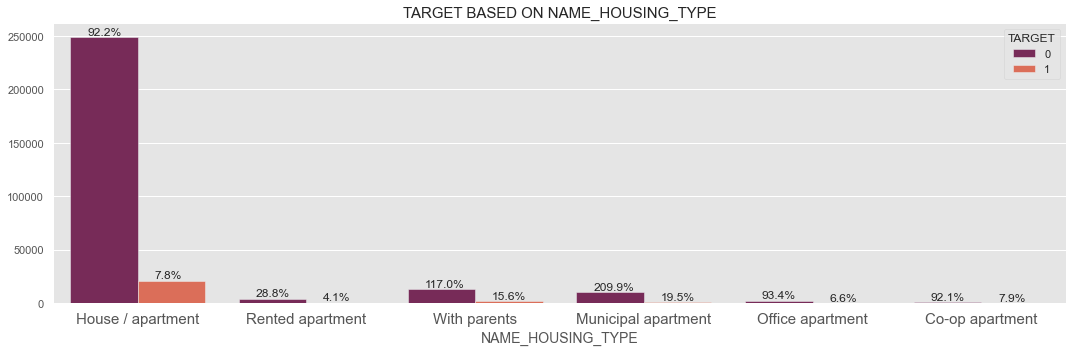

In [138]:

plt.figure(figsize=(15,5))
ax = sns.countplot(x='NAME_HOUSING_TYPE', data=train, hue='TARGET',palette='rocket')
ax.set_title('TARGET BASED ON NAME_HOUSING_TYPE', fontsize=15)
ax.set_xlabel('NAME_HOUSING_TYPE', fontsize= 14)
ax.set_ylabel('')
plt.xticks(fontsize=15)
plt.tight_layout()
percentage_hue(ax, train['NAME_HOUSING_TYPE'], 6,2)

###  'WEEKDAY_APPR_PROCESS_START' Feature

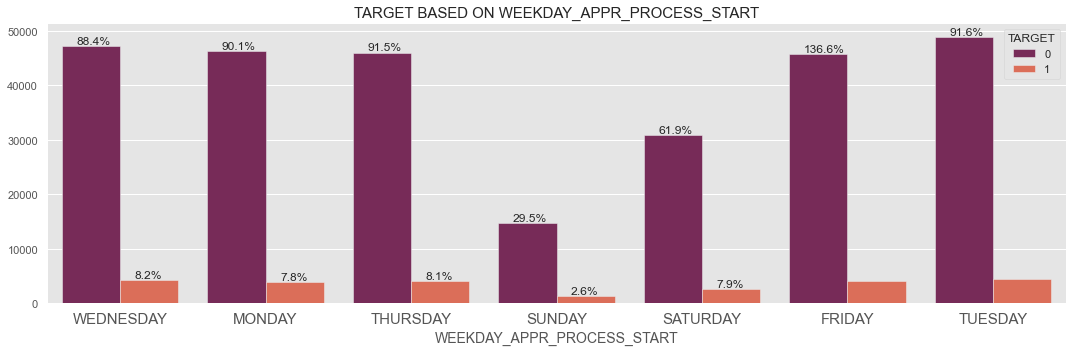

In [139]:

plt.figure(figsize=(15,5))
ax = sns.countplot(x='WEEKDAY_APPR_PROCESS_START', data=train, hue='TARGET',palette='rocket')
ax.set_title('TARGET BASED ON WEEKDAY_APPR_PROCESS_START', fontsize=15)
ax.set_xlabel('WEEKDAY_APPR_PROCESS_START', fontsize= 14)
ax.set_ylabel('')
plt.xticks(fontsize=15)
plt.tight_layout()
percentage_hue(ax, train['WEEKDAY_APPR_PROCESS_START'], 6,2)

## Feature Engineering

In [180]:
train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,202500.0,406597.5,24700.5,Unaccompanied,...,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
1,100003,0,Cash loans,F,N,N,270000.0,1293502.5,35698.5,Family,...,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,100004,0,Revolving loans,M,Y,Y,67500.0,135000.0,6750.0,Unaccompanied,...,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,100006,0,Cash loans,F,N,Y,135000.0,312682.5,29686.5,Unaccompanied,...,0,0,0,0,0.006385,0.006981,0.034494,0.267794,0.266127,1.905954
4,100007,0,Cash loans,M,N,Y,121500.0,513000.0,21865.5,Unaccompanied,...,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,157500.0,254700.0,27558.0,Unaccompanied,...,0,0,0,0,0.006385,0.006981,0.034494,0.267794,0.266127,1.905954
307507,456252,0,Cash loans,F,N,Y,72000.0,269550.0,12001.5,Unaccompanied,...,0,0,0,0,0.006385,0.006981,0.034494,0.267794,0.266127,1.905954
307508,456253,0,Cash loans,F,N,Y,153000.0,677664.0,29979.0,Unaccompanied,...,0,0,0,0,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
307509,456254,1,Cash loans,F,N,Y,171000.0,370107.0,20205.0,Unaccompanied,...,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [181]:
test

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,135000.0,568800.0,20560.5,Unaccompanied,Working,...,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,100005,Cash loans,M,N,Y,99000.0,222768.0,17370.0,Unaccompanied,Working,...,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
3,100028,Cash loans,F,N,Y,315000.0,1575000.0,49018.5,Unaccompanied,Working,...,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
4,100038,Cash loans,M,Y,N,180000.0,625500.0,32067.0,Unaccompanied,Working,...,0,0,0,0,0.002104,0.001841,0.002822,0.009445,0.550274,1.976256
5,100042,Cash loans,F,Y,Y,270000.0,959688.0,34600.5,Unaccompanied,State servant,...,0,0,0,0,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,Cash loans,F,N,Y,121500.0,412560.0,17473.5,Unaccompanied,Working,...,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
48740,456222,Cash loans,F,N,N,157500.0,622413.0,31909.5,Unaccompanied,Commercial associate,...,0,0,0,0,0.002104,0.001841,0.002822,0.009445,0.550274,1.976256
48741,456223,Cash loans,F,Y,Y,202500.0,315000.0,33205.5,Unaccompanied,Commercial associate,...,0,0,0,0,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000
48742,456224,Cash loans,M,N,N,225000.0,450000.0,25128.0,Family,Commercial associate,...,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000


### ORGANIZATION_TYPE 

**Replace the values with more general value, so it'll be easier to make a one hot labelling**

In [198]:
train['ORGANIZATION_TYPE'].value_counts().head(58)

Business               83651
Other                  71400
Self-employed          38051
Industry               14194
Trade                  14161
Medicine               11079
Government             10309
Transport               8911
School                  8823
Kindergarten            6823
Construction            6659
Security                3216
Housing                 2935
Military                2610
Bank                    2455
Agriculture             2436
Police                  2319
Postal                  2137
Security Ministries     1953
Restaurant              1794
Services                1561
University              1311
Hotel                    959
Electricity              940
Insurance                591
Telecom                  568
Emergency                552
Advertising              428
Realtor                  388
Culture                  373
Mobile                   314
Legal Services           303
Cleaning                 254
Religion                  85
Name: ORGANIZA

In [197]:
train['ORGANIZATION_TYPE'].replace('Business Entity Type 1', 'Business', inplace=True)
train['ORGANIZATION_TYPE'].replace('Business Entity Type 2', 'Business', inplace=True)
train['ORGANIZATION_TYPE'].replace('Business Entity Type 3', 'Business', inplace=True)
train['ORGANIZATION_TYPE'].replace('Trade: type 1', 'Trade', inplace=True)
train['ORGANIZATION_TYPE'].replace('Trade: type 2', 'Trade', inplace=True)
train['ORGANIZATION_TYPE'].replace('Trade: type 3', 'Trade', inplace=True)
train['ORGANIZATION_TYPE'].replace('Trade: type 4', 'Trade', inplace=True)
train['ORGANIZATION_TYPE'].replace('Trade: type 5', 'Trade', inplace=True)
train['ORGANIZATION_TYPE'].replace('Trade: type 6', 'Trade', inplace=True)
train['ORGANIZATION_TYPE'].replace('Trade: type 7', 'Trade', inplace=True)
train['ORGANIZATION_TYPE'].replace('Transport: type 1', 'Transport', inplace=True)
train['ORGANIZATION_TYPE'].replace('Transport: type 2', 'Transport', inplace=True)
train['ORGANIZATION_TYPE'].replace('Transport: type 3', 'Transport', inplace=True)
train['ORGANIZATION_TYPE'].replace('Transport: type 4', 'Transport', inplace=True)
train['ORGANIZATION_TYPE'].replace('Industry: type 1', 'Industry', inplace=True)
train['ORGANIZATION_TYPE'].replace('Industry: type 2', 'Industry', inplace=True)
train['ORGANIZATION_TYPE'].replace('Industry: type 3', 'Industry', inplace=True)
train['ORGANIZATION_TYPE'].replace('Industry: type 4', 'Industry', inplace=True)
train['ORGANIZATION_TYPE'].replace('Industry: type 5', 'Industry', inplace=True)
train['ORGANIZATION_TYPE'].replace('Industry: type 6', 'Industry', inplace=True)
train['ORGANIZATION_TYPE'].replace('Industry: type 7', 'Industry', inplace=True)
train['ORGANIZATION_TYPE'].replace('Industry: type 8', 'Industry', inplace=True)
train['ORGANIZATION_TYPE'].replace('Industry: type 9', 'Industry', inplace=True)
train['ORGANIZATION_TYPE'].replace('Industry: type 10', 'Industry', inplace=True)
train['ORGANIZATION_TYPE'].replace('Industry: type 11', 'Industry', inplace=True)
train['ORGANIZATION_TYPE'].replace('Industry: type 12', 'Industry', inplace=True)
train['ORGANIZATION_TYPE'].replace('Industry: type 13', 'Industry', inplace=True)
train['ORGANIZATION_TYPE'].replace('XNA', 'Other', inplace=True)

In [201]:
test['ORGANIZATION_TYPE'].value_counts().head(58)

Business Entity Type 3    10620
XNA                        9047
Self-employed              5810
Other                      2654
Medicine                   1689
Government                 1476
Business Entity Type 2     1452
Trade: type 7              1275
School                     1263
Kindergarten               1024
Construction               1021
Business Entity Type 1      873
Transport: type 4           873
Trade: type 3               570
Military                    519
Industry: type 9            491
Industry: type 3            477
Security                    464
Transport: type 2           438
Police                      429
Housing                     425
Industry: type 11           411
Bank                        371
Security Ministries         334
Services                    293
Agriculture                 289
Postal                      288
Restaurant                  281
Trade: type 2               238
University                  216
Industry: type 7            214
Industry

In [202]:
test['ORGANIZATION_TYPE'].replace('Business Entity Type 1', 'Business', inplace=True)
test['ORGANIZATION_TYPE'].replace('Business Entity Type 2', 'Business', inplace=True)
test['ORGANIZATION_TYPE'].replace('Business Entity Type 3', 'Business', inplace=True)
test['ORGANIZATION_TYPE'].replace('Trade: type 1', 'Trade', inplace=True)
test['ORGANIZATION_TYPE'].replace('Trade: type 2', 'Trade', inplace=True)
test['ORGANIZATION_TYPE'].replace('Trade: type 3', 'Trade', inplace=True)
test['ORGANIZATION_TYPE'].replace('Trade: type 4', 'Trade', inplace=True)
test['ORGANIZATION_TYPE'].replace('Trade: type 5', 'Trade', inplace=True)
test['ORGANIZATION_TYPE'].replace('Trade: type 6', 'Trade', inplace=True)
test['ORGANIZATION_TYPE'].replace('Trade: type 7', 'Trade', inplace=True)
test['ORGANIZATION_TYPE'].replace('Transport: type 1', 'Transport', inplace=True)
test['ORGANIZATION_TYPE'].replace('Transport: type 2', 'Transport', inplace=True)
test['ORGANIZATION_TYPE'].replace('Transport: type 3', 'Transport', inplace=True)
test['ORGANIZATION_TYPE'].replace('Transport: type 4', 'Transport', inplace=True)
test['ORGANIZATION_TYPE'].replace('Industry: type 1', 'Industry', inplace=True)
test['ORGANIZATION_TYPE'].replace('Industry: type 2', 'Industry', inplace=True)
test['ORGANIZATION_TYPE'].replace('Industry: type 3', 'Industry', inplace=True)
test['ORGANIZATION_TYPE'].replace('Industry: type 4', 'Industry', inplace=True)
test['ORGANIZATION_TYPE'].replace('Industry: type 5', 'Industry', inplace=True)
test['ORGANIZATION_TYPE'].replace('Industry: type 6', 'Industry', inplace=True)
test['ORGANIZATION_TYPE'].replace('Industry: type 7', 'Industry', inplace=True)
test['ORGANIZATION_TYPE'].replace('Industry: type 8', 'Industry', inplace=True)
test['ORGANIZATION_TYPE'].replace('Industry: type 9', 'Industry', inplace=True)
test['ORGANIZATION_TYPE'].replace('Industry: type 10', 'Industry', inplace=True)
test['ORGANIZATION_TYPE'].replace('Industry: type 11', 'Industry', inplace=True)
test['ORGANIZATION_TYPE'].replace('Industry: type 12', 'Industry', inplace=True)
test['ORGANIZATION_TYPE'].replace('Industry: type 13', 'Industry', inplace=True)
test['ORGANIZATION_TYPE'].replace('XNA', 'Other', inplace=True)

### ONE HOT ENCODING

In [208]:
dct = list(data_cat_train.columns)
dct

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE']

In [266]:
train_encode = train
test_encode = test

In [267]:
for i in range(len(dct)):
    train_encode = pd.get_dummies(train_encode, columns=[dct[i]], drop_first=True)
    test_encode = pd.get_dummies(test_encode, columns=[dct[i]], drop_first=True)

In [216]:
train_encode

,SK_ID_CURR,TARGET,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade,ORGANIZATION_TYPE_Transport,ORGANIZATION_TYPE_University
0,100002,1,202500.0,406597.5,24700.5,0.018801,-9461,-637,-3648.0,-2120,...,0,0,0,0,0,0,0,0,0,0
1,100003,0,270000.0,1293502.5,35698.5,0.003541,-16765,-1188,-1186.0,-291,...,0,1,0,0,0,0,0,0,0,0
2,100004,0,67500.0,135000.0,6750.0,0.010032,-19046,-225,-4260.0,-2531,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,135000.0,312682.5,29686.5,0.008019,-19005,-3039,-9833.0,-2437,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,121500.0,513000.0,21865.5,0.028663,-19932,-3038,-4311.0,-3458,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,157500.0,254700.0,27558.0,0.032561,-9327,-236,-8456.0,-1982,...,0,0,0,0,0,1,0,0,0,0
307507,456252,0,72000.0,269550.0,12001.5,0.025164,-20775,365243,-4388.0,-4090,...,0,0,0,0,0,0,0,0,0,0
307508,456253,0,153000.0,677664.0,29979.0,0.005002,-14966,-7921,-6737.0,-5150,...,0,1,0,0,0,0,0,0,0,0
307509,456254,1,171000.0,370107.0,20205.0,0.005313,-11961,-4786,-2562.0,-931,...,0,0,0,0,0,0,0,0,0,0


In [217]:
test_encode

,SK_ID_CURR,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,...,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade,ORGANIZATION_TYPE_Transport,ORGANIZATION_TYPE_University
0,100001,135000.0,568800.0,20560.5,0.018850,-19241,-2329,-5170.0,-812,1,...,0,0,0,0,0,0,0,0,0,0
1,100005,99000.0,222768.0,17370.0,0.035792,-18064,-4469,-9118.0,-1623,1,...,0,0,0,0,1,0,0,0,0,0
3,100028,315000.0,1575000.0,49018.5,0.026392,-13976,-1866,-2000.0,-4208,1,...,0,0,0,0,0,0,0,0,0,0
4,100038,180000.0,625500.0,32067.0,0.010032,-13040,-2191,-4000.0,-4262,1,...,0,0,0,0,0,0,0,0,0,0
5,100042,270000.0,959688.0,34600.5,0.025164,-18604,-12009,-6116.0,-2027,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,121500.0,412560.0,17473.5,0.002042,-19970,-5169,-9094.0,-3399,1,...,0,0,0,0,0,0,0,0,0,0
48740,456222,157500.0,622413.0,31909.5,0.035792,-11186,-1149,-3015.0,-3003,1,...,0,0,0,0,0,0,0,1,0,0
48741,456223,202500.0,315000.0,33205.5,0.026392,-15922,-3037,-2681.0,-1504,1,...,0,0,0,0,0,0,0,0,0,0
48742,456224,225000.0,450000.0,25128.0,0.018850,-13968,-2731,-1461.0,-1364,1,...,0,0,0,0,1,0,0,0,0,0


### DROP SK_ID_CURR

In [268]:
train_encode = train_encode.drop('SK_ID_CURR', axis=1)
train_encode.head(3)

,TARGET,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,...,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade,ORGANIZATION_TYPE_Transport,ORGANIZATION_TYPE_University
0,1,202500.0,406597.5,24700.5,0.018801,-9461,-637,-3648.0,-2120,1,...,0,0,0,0,0,0,0,0,0,0
1,0,270000.0,1293502.5,35698.5,0.003541,-16765,-1188,-1186.0,-291,1,...,0,1,0,0,0,0,0,0,0,0
2,0,67500.0,135000.0,6750.0,0.010032,-19046,-225,-4260.0,-2531,1,...,0,0,0,0,0,0,0,0,0,0


In [269]:
test_encode = test_encode.drop('SK_ID_CURR', axis=1)
test_encode.head(5)

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,...,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade,ORGANIZATION_TYPE_Transport,ORGANIZATION_TYPE_University
0,135000.0,568800.0,20560.5,0.018850,-19241,-2329,-5170.0,-812,1,1,...,0,0,0,0,0,0,0,0,0,0
1,99000.0,222768.0,17370.0,0.035792,-18064,-4469,-9118.0,-1623,1,1,...,0,0,0,0,1,0,0,0,0,0
3,315000.0,1575000.0,49018.5,0.026392,-13976,-1866,-2000.0,-4208,1,1,...,0,0,0,0,0,0,0,0,0,0
4,180000.0,625500.0,32067.0,0.010032,-13040,-2191,-4000.0,-4262,1,1,...,0,0,0,0,0,0,0,0,0,0
5,270000.0,959688.0,34600.5,0.025164,-18604,-12009,-6116.0,-2027,1,1,...,0,0,0,0,0,0,0,0,0,0


### SAMPLING DATASET

In [307]:
train_encode =train_encode[~train_encode.isin([np.nan, np.inf, -np.inf]).any(1)]

In [308]:
X = train_encode.drop(['TARGET'],axis=1)
y = train_encode['TARGET']

In [278]:
y.value_counts(normalize=True)

0    0.919003
1    0.080997
Name: TARGET, dtype: float64

In [279]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 304543 entries, 0 to 307510
Columns: 123 entries, AMT_INCOME_TOTAL to ORGANIZATION_TYPE_University
dtypes: float64(17), int64(36), uint8(70)
memory usage: 155.8 MB


In [273]:
train_encode = train_encode.fillna(lambda x: x.median())

In [274]:
train_encode['AMT_ANNUITY'] = pd.to_numeric(train_encode['AMT_ANNUITY'], errors='coerce')

In [275]:
test_encode = test_encode.fillna(lambda x: x.median())

In [276]:
test_encode['AMT_ANNUITY'] = pd.to_numeric(test_encode['AMT_ANNUITY'], errors='coerce')

### CombineSampling

In [314]:
from imblearn.combine import SMOTETomek

In [313]:
y.value_counts(normalize=True)

0    0.919
1    0.081
Name: TARGET, dtype: float64

In [315]:
smt = SMOTETomek(random_state=42)
X_res, y_res = smt.fit_resample(X, y)

In [316]:
y_res.value_counts(normalize=True)

1    0.5
0    0.5
Name: TARGET, dtype: float64

### Scaler

In [317]:
scaler = StandardScaler()

In [318]:
train_scaled = scaler.fit_transform(X_res)

In [319]:
test_scaled = scaler.fit_transform(test_encode)

# Modeling and Evaluation

In [320]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
import xgboost as xgb
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold, KFold, GridSearchCV
from sklearn.metrics import f1_score, roc_auc_score,accuracy_score,confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score, classification_report, plot_confusion_matrix,precision_score

In [321]:
def plot_ROC(fpr, tpr, m_name):
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(6, 6))
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc, alpha=0.5)
    
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--', alpha=0.5)
    
    plt.xlim([-0.01, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.grid(True)
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.title('Receiver operating characteristic for %s'%m_name, fontsize=20)
    plt.legend(loc="lower right", fontsize=16)
    plt.show()

In [323]:
X_train, X_test, y_train, y_test = train_test_split (train_scaled, y_res, test_size=1/3, random_state=101)

In [324]:
params = {"objective":"binary:logistic"}
xgb_model = xgb.XGBClassifier(**params)
xgb_model.fit(X_train,y_train)
pred = xgb_model.predict_proba(X_test)[:,1]

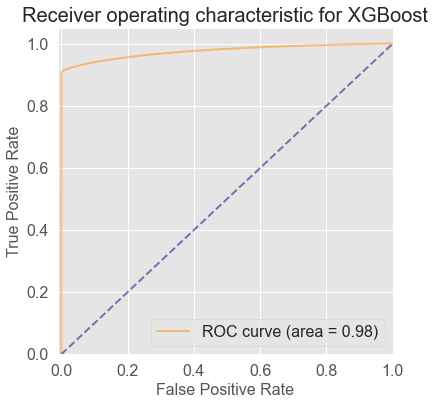

In [325]:
(fpr, tpr, thresholds) = roc_curve(y_test, pred)
plot_ROC(fpr, tpr,'XGBoost')

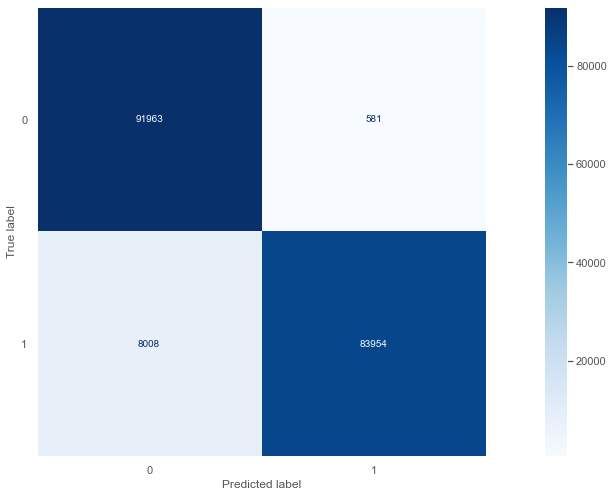

In [326]:
plot_confusion_matrix(xgb_model, X_test, y_test, cmap=plt.cm.Blues)
plt.grid(False)
plt.show()


In [327]:
print(classification_report(y_test, pred>0.5))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96     92544
           1       0.99      0.91      0.95     91962

    accuracy                           0.95    184506
   macro avg       0.96      0.95      0.95    184506
weighted avg       0.96      0.95      0.95    184506



In [328]:
print(f"ACCURACY XGBOOST: {accuracy_score(y_test, pred>0.5)}")
print(F"f1 SCORE XGBOOST: {f1_score(y_test, pred>0.5, average='weighted')}")
print(f"PRECISION XGBOOST: {precision_score(y_test, pred>0.5, average='weighted')}")
print(F"RECALL XGBOOST: {recall_score(y_test, pred>0.5, average='weighted')}")

ACCURACY XGBOOST: 0.9534486683359891
f1 SCORE XGBOOST: 0.9533671750321272
PRECISION XGBOOST: 0.9563964408381612
RECALL XGBOOST: 0.9534486683359891


In [337]:
from xgboost import cv

params = {"objective":"binary:logistic"}
data_dmatrix = xgb.DMatrix(data=train_scaled,label=y_res)
xgb_cv = cv(dtrain=data_dmatrix, params=params, nfold=5,
                    num_boost_round=50, early_stopping_rounds=10, metrics="auc", as_pandas=True, seed=123)

In [344]:
xgb_cv.head()

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.888368,0.000429,0.887502,0.000693
1,0.923039,0.000965,0.922402,0.000983
2,0.940372,0.003200,0.939742,0.003859
3,0.949086,0.000799,0.948637,0.001635
4,0.956615,0.001691,0.956163,0.002242


# Submission

In [345]:
predSub = xgb_model.predict_proba(test_scaled)[:,1]

In [346]:
predSub

array([0.9999862 , 0.9999907 , 0.9999783 , ..., 0.99998224, 0.99999   ,
       0.9999887 ], dtype=float32)

In [351]:
A = np.concatenate((test['SK_ID_CURR'].values.reshape(-1,1), predSub.reshape(-1,1)), axis=1)

In [352]:
submission = pd.DataFrame(data = A,columns = [['SK_ID_CURR','Target']]) 

In [353]:
submission.head()

,SK_ID_CURR,Target
0,100001.0,0.999986
1,100005.0,0.999991
2,100028.0,0.999978
3,100038.0,0.999989
4,100042.0,0.999997


In [354]:
submission.to_csv('submission.csv', index=False)